<a href="https://colab.research.google.com/github/oscarcortez/de-opa-1/blob/main/OPA_1_cryptobot-oscarcortez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting the data

Collecting two types of data through the Binance API using a streaming architecture.  

Thanks to this API, we can retrieve information on the prices of different markets (BTC-USDT, BTC-ETH, ...).
The goal will be to create a generic data retrieval function in order to have data from any market.
It will also be necessary to create a pre-processing script to reorganise the data coming out of the stream so that it is clean.

Recovering historical data, pre-processed to train our future model


In [14]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [15]:
data = yf.download("BTC", period="1mo")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-05,90.915298,90.915298,90.915298,90.915298,90.915298,14
2023-07-06,90.569702,90.571098,90.569702,90.571098,90.571098,365
2023-07-07,90.605003,90.605003,90.605003,90.605003,90.605003,5
2023-07-10,90.886299,90.886299,90.886299,90.886299,90.886299,7
2023-07-11,90.989899,90.989899,90.949203,90.949997,90.949997,2623
2023-07-12,91.320000,91.519997,91.320000,91.445396,91.445396,9504
2023-07-13,91.901001,91.910004,91.879997,91.879997,91.879997,6518
2023-07-14,91.709999,91.729897,91.709999,91.717003,91.717003,57723
2023-07-17,91.580002,91.654099,91.580002,91.654099,91.654099,24002


In [16]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-05,90.915298,90.915298,90.915298,90.915298,90.915298,14
2023-07-06,90.569702,90.571098,90.569702,90.571098,90.571098,365
2023-07-07,90.605003,90.605003,90.605003,90.605003,90.605003,5
2023-07-10,90.886299,90.886299,90.886299,90.886299,90.886299,7
2023-07-11,90.989899,90.989899,90.949203,90.949997,90.949997,2623


In [17]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-28,91.249802,91.300003,91.245003,91.300003,91.300003,2170
2023-07-31,91.393700,91.449997,91.309998,91.347504,91.347504,6198
2023-08-01,91.117996,91.117996,91.117996,91.117996,91.117996,7
2023-08-02,91.052902,91.052902,91.052902,91.052902,91.052902,48
2023-08-03,90.841003,90.841003,90.629997,90.806297,90.806297,19669


In [18]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

# download dataframe
data = pdr.get_data_yahoo("BTC", start="2023-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [19]:
data.shape

(147, 6)

In [20]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,90.591003,90.618797,90.570000,90.618797,90.618797,1715
2023-01-04,90.879204,90.879204,90.879204,90.879204,90.879204,103
2023-01-05,90.751404,90.751404,90.751404,90.751404,90.751404,11
2023-01-06,90.919998,91.408302,90.919998,91.408302,91.408302,11299
2023-01-09,91.429001,91.599998,91.429001,91.599998,91.599998,3790


In [21]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-28,91.249802,91.300003,91.245003,91.300003,91.300003,2170
2023-07-31,91.393700,91.449997,91.309998,91.347504,91.347504,6198
2023-08-01,91.117996,91.117996,91.117996,91.117996,91.117996,7
2023-08-02,91.052902,91.052902,91.052902,91.052902,91.052902,48
2023-08-03,90.841003,90.841003,90.629997,90.806297,90.806297,19669


In [22]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [23]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

<Axes: >

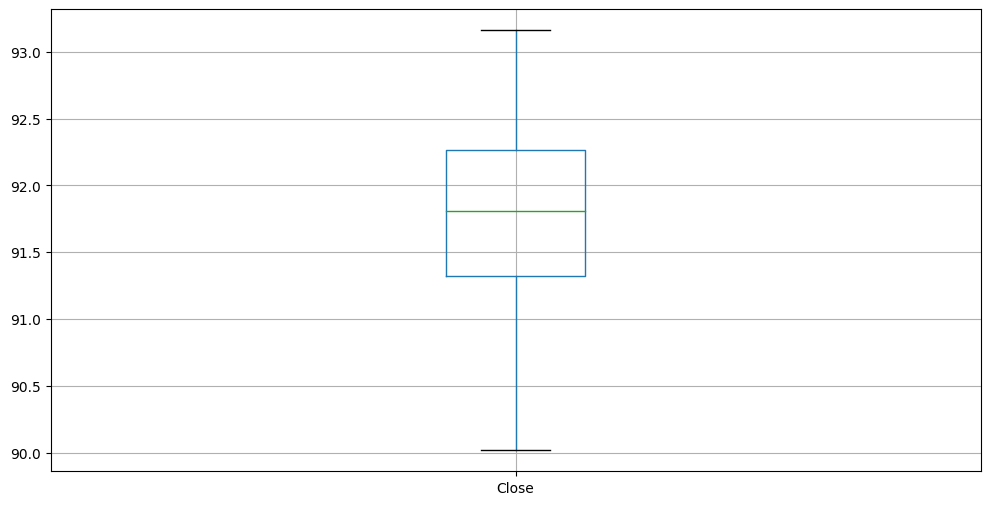

In [24]:
data.boxplot(['Close'])
# data cleaned

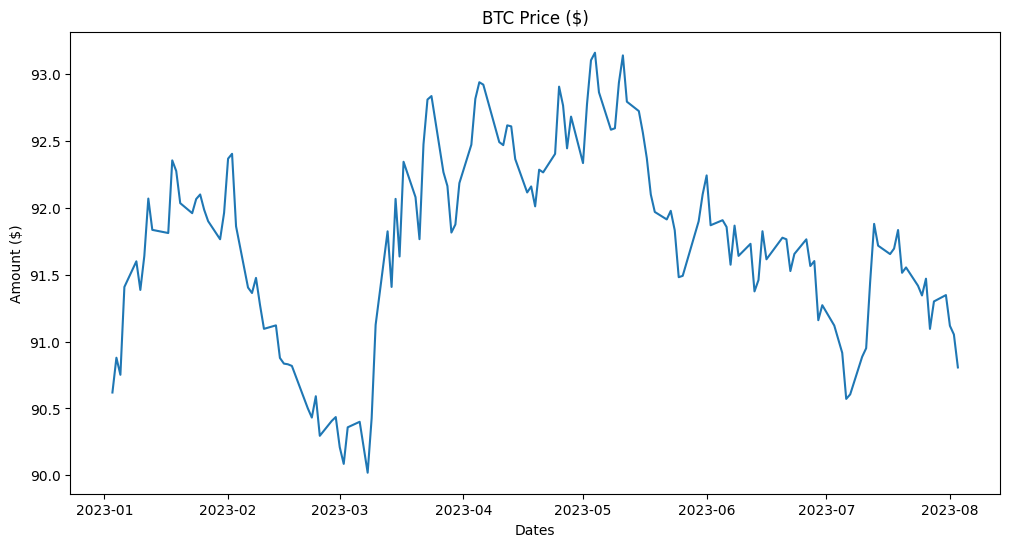

In [25]:

plt.plot()
plt.plot(data.index, data['Close'])
plt.title('BTC Price ($)')
plt.xlabel('Dates')
plt.ylabel('Amount ($)')
plt.rcParams["figure.figsize"] = (12,6)

plt.show()

In [26]:

data['year'] = data.index.year
data

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2023-01-03,90.591003,90.618797,90.570000,90.618797,90.618797,1715,2023
2023-01-04,90.879204,90.879204,90.879204,90.879204,90.879204,103,2023
2023-01-05,90.751404,90.751404,90.751404,90.751404,90.751404,11,2023
2023-01-06,90.919998,91.408302,90.919998,91.408302,91.408302,11299,2023
2023-01-09,91.429001,91.599998,91.429001,91.599998,91.599998,3790,2023
...,...,...,...,...,...,...,...
2023-07-28,91.249802,91.300003,91.245003,91.300003,91.300003,2170,2023
2023-07-31,91.393700,91.449997,91.309998,91.347504,91.347504,6198,2023
2023-08-01,91.117996,91.117996,91.117996,91.117996,91.117996,7,2023


In [27]:
x_date_sell = data['Close'].idxmax()
x_date_sell

Timestamp('2023-05-04 00:00:00')

In [28]:
y_price_sell = data.loc[x_date_sell].Close
y_price_sell

93.16000366210938

In [29]:
x_date_buy = data['Close'].idxmin()

In [30]:
y_price_sell

93.16000366210938

In [31]:
y_price_buy = data.loc[x_date_buy].Close
y_price_buy

90.01899719238281

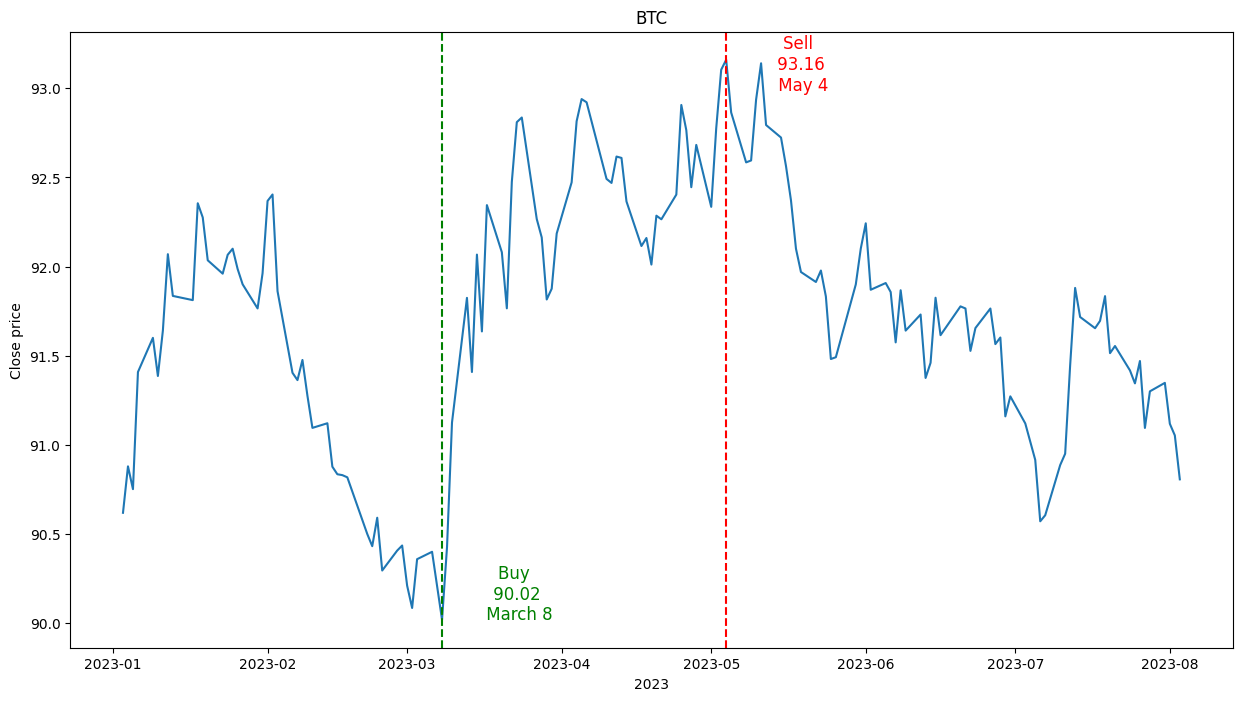

In [36]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=data.index, y=data.Close)

show_date_sell = f'{x_date_sell.strftime("%B")} {x_date_sell.day}'
show_date_buy = f'{x_date_buy.strftime("%B")} {x_date_buy.day}'

plt.text(x_date_sell + timedelta(days=15), y_price_sell - 0.17, f'Sell \n {round(y_price_sell,2)} \n {show_date_sell}', fontsize=12, ha='center', color = 'red')
plt.text(x_date_buy + timedelta(days=15), y_price_buy, f'Buy \n {round(y_price_buy,2)} \n {show_date_buy}', fontsize=12, ha='center', color = 'green')

plt.axvline(x=x_date_buy, color='green', linestyle='--')
plt.axvline(x=x_date_sell, color='red', linestyle='--')
plt.xlabel('2023')
plt.ylabel('Close price')
plt.title('BTC')
plt.show()